In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import cartopy.crs as ccrs
import cartopy
import pandas as pd

coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [196]:
fdate = '_' + str(2006) +'_' + str(7).zfill(2) + '_'
sdate = str(2006) + str(8).zfill(2) + str(2).zfill(2)

In [177]:
SMobsday = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + sdate + '.nc').squeeze()
SMobsnight = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + sdate + '.nc').squeeze()

In [180]:
mcs = xr.open_dataarray(cnst.MCS_15K)

In [181]:
mcs

<xarray.DataArray (time: 14589, lat: 253, lon: 519)>
[1915637823 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -11.66 -11.62 -11.57 -11.53 ... 11.51 11.56 11.6
  * lat      (lat) float64 8.986 9.03 9.075 9.119 ... 19.87 19.91 19.95 19.99
  * time     (time) datetime64[ns] 2006-06-01 ... 2010-09-30T23:00:00

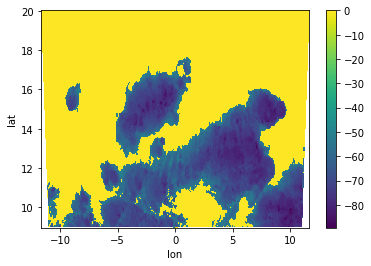

In [190]:
mcs.sel(time='20060731').min('time').plot()

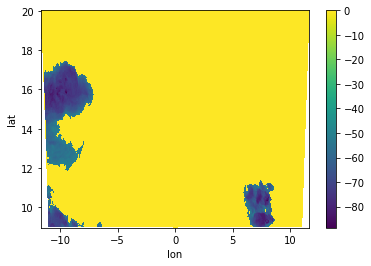

In [195]:
mcs.sel(time='20060801').isel(time=slice(15,19)).min('time').plot()

In [197]:

lsta = xr.open_dataset(cnst.ERA5 + 'hourly/pressure_levels/ERA5' + fdate + 'pl.nc') #sma  #'AMSR_L3_LPRMv05_A_'
srfc = xr.open_dataset(cnst.ERA5 + 'hourly/surface/ERA5' + fdate + 'srfc.nc') #sma  #'AMSR_L3_LPRMv05_A_'
srfcSM = xr.open_dataset(cnst.ERA5 + 'hourly/surface/ERA5' + fdate + 'srfc_SM.nc')


In [198]:
lsta = u_darrays.flip_lat(lsta)
srfc = u_darrays.flip_lat(srfc)
srfcSM = u_darrays.flip_lat(srfcSM)

In [199]:
lsta_d = lsta.sel(time=( (lsta['time.hour']==12))).squeeze()
srfc_d = srfc.sel(time=((srfc['time.hour']==12))).squeeze()
srfc_dSM = srfcSM.sel(time=((srfcSM['time.hour']==12))).squeeze()

In [169]:
srfc_dSM

<xarray.Dataset>
Dimensions:    (latitude: 87, longitude: 143, time: 31)
Coordinates:
  * longitude  (longitude) float32 -18.5 -18.25 -18.0 -17.75 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 3.5 3.75 4.0 4.25 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 2006-08-01T12:00:00 ... 2006-08-31T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-05 18:03:02 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [90]:
SMobsnight

<xarray.Dataset>
Dimensions:  (lat: 108, lon: 192)
Coordinates:
    time     datetime64[ns] 2006-08-02T13:00:00
  * lat      (lat) float64 0.125 0.375 0.625 0.875 ... 26.12 26.38 26.62 26.88
  * lon      (lon) float64 -17.88 -17.62 -17.38 -17.12 ... 29.38 29.62 29.88
Data variables:
    SM       (lat, lon) float64 ...

In [91]:
SMmerge = SMobsday.copy(deep=True)

In [92]:
SMmerge['SM'].values[np.isnan(SMmerge['SM'].values)] = SMobsnight['SM'].values[np.isnan(SMmerge['SM'].values)]

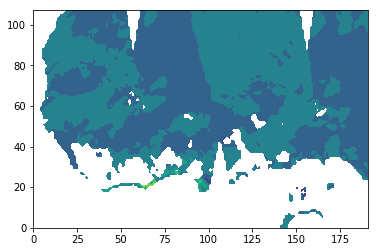

In [93]:
plt.contourf(SMmerge['SM'])

In [203]:
sdate = str(2006) + str(7).zfill(2) + str(28).zfill(2)
SMobsday = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + sdate + '.nc').squeeze()
SMobsnight = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + sdate + '.nc').squeeze()

In [204]:
sdate = str(2006) + str(8).zfill(2) + str(1).zfill(2)
SMobsday2 = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + sdate + '.nc').squeeze()
SMobsnight2 = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + sdate + '.nc').squeeze()

In [205]:
sdate = str(2006) + str(8).zfill(2) + str(4).zfill(2)
SMobsday3 = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + sdate + '.nc').squeeze()
SMobsnight3 = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + sdate + '.nc').squeeze()

In [206]:
SMmerge = SMobsday.copy(deep=True)
SMmerge['SM'].values[np.isnan(SMmerge['SM'].values)] = SMobsnight['SM'].values[np.isnan(SMmerge['SM'].values)]

In [207]:
SMmerge2 = SMobsday2.copy(deep=True)
SMmerge2['SM'].values[np.isnan(SMmerge2['SM'].values)] = SMobsnight2['SM'].values[np.isnan(SMmerge2['SM'].values)]

In [208]:
SMmerge3 = SMobsday3.copy(deep=True)
SMmerge3['SM'].values[np.isnan(SMmerge3['SM'].values)] = SMobsnight3['SM'].values[np.isnan(SMmerge3['SM'].values)]

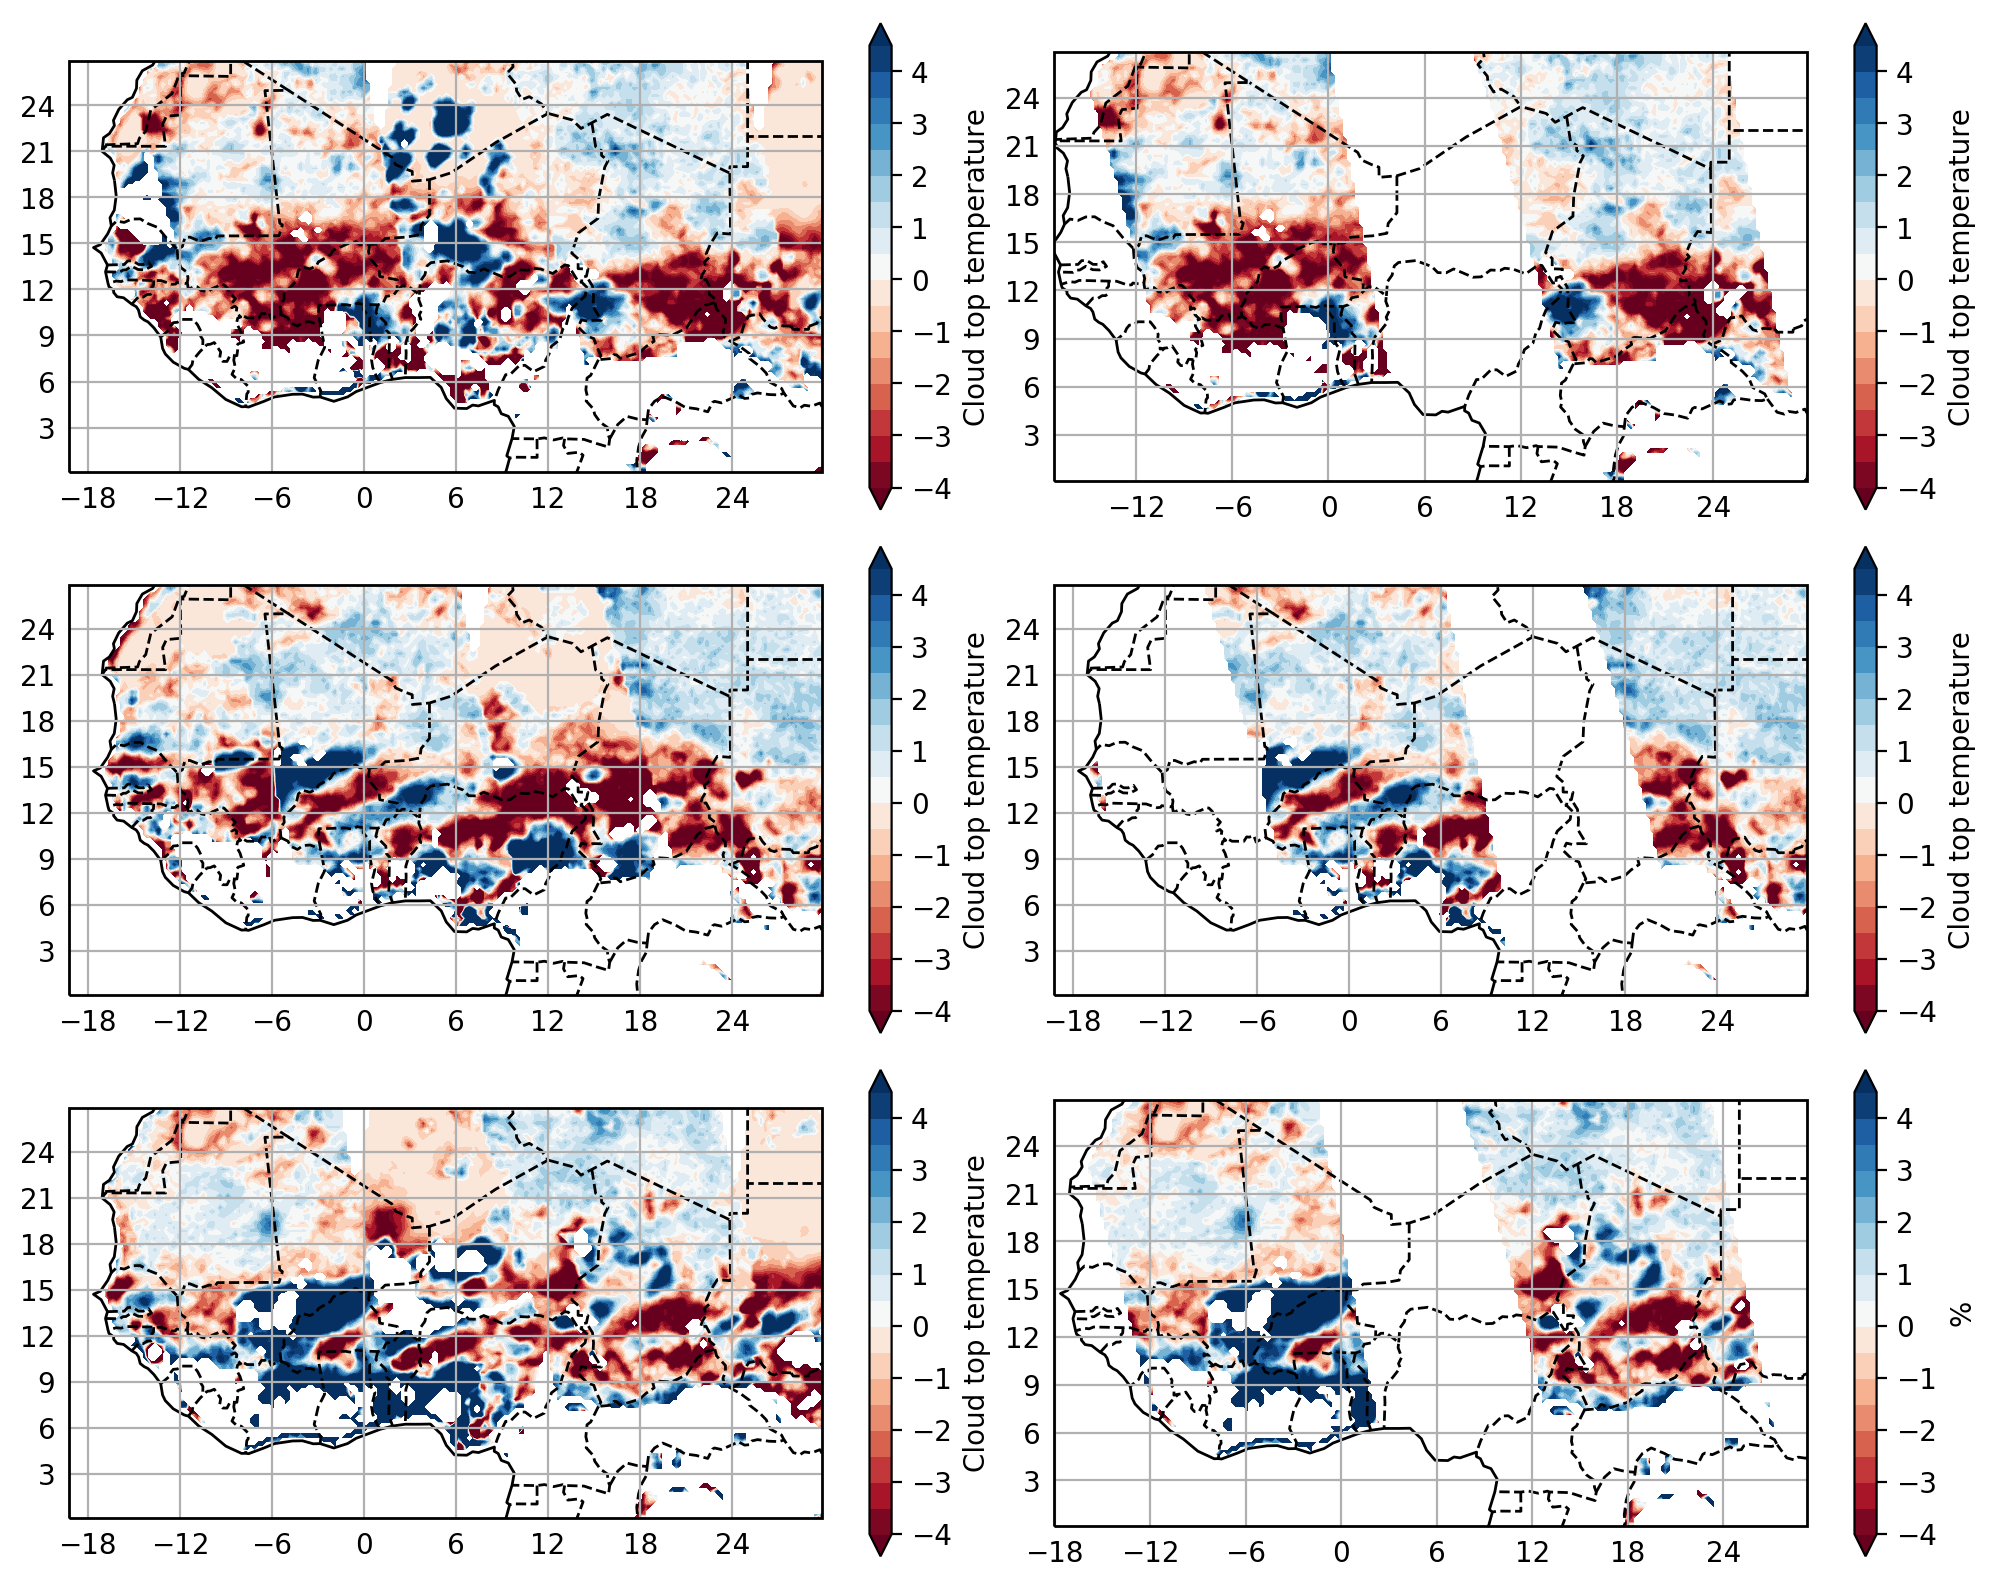

In [209]:
f = plt.figure(figsize=(10,8), dpi=200)
ax = f.add_subplot(321,projection=ccrs.PlateCarree() )

#plt.contourf(srfc_dSM['longitude'], srfc_dSM['latitude'], srfc_dSM['swvl1']-srfc_dSM['swvl1'].sel(latitude=slice(10,16), longitude=slice(-10,10)).mean(), cmap='RdBu', vmin=-0.1, vmax=0.1, extend='both')


mapp = ax.contourf(SMmerge['lon'], SMmerge['lat'], SMmerge['SM'], cmap='RdBu', levels=np.arange(-4,5, 0.5), extend='both')
plt.colorbar(mapp, label='Cloud top temperature')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(322,projection=ccrs.PlateCarree() )

mapp = ax.contourf(SMobsday['lon'], SMobsday['lat'], SMobsday['SM'], cmap='RdBu', levels=np.arange(-4,5, 0.5), extend='both')
plt.colorbar(mapp, label='Cloud top temperature')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(323,projection=ccrs.PlateCarree() )
mapp = ax.contourf(SMmerge2['lon'], SMmerge2['lat'], SMmerge2['SM'], cmap='RdBu', levels=np.arange(-4,5, 0.5), extend='both')
plt.colorbar(mapp, label='Cloud top temperature')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(324,projection=ccrs.PlateCarree() )

mapp = ax.contourf(SMobsday2['lon'], SMobsday2['lat'], SMobsday2['SM'], cmap='RdBu', levels=np.arange(-4,5, 0.5), extend='both')
plt.colorbar(mapp, label='Cloud top temperature')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(325,projection=ccrs.PlateCarree() )
mapp = ax.contourf(SMmerge3['lon'], SMmerge3['lat'], SMmerge3['SM'], cmap='RdBu', levels=np.arange(-4,5, 0.5), extend='both')
plt.colorbar(mapp, label='Cloud top temperature')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(326,projection=ccrs.PlateCarree() )

mapp = ax.contourf(SMobsday3['lon'], SMobsday3['lat'], SMobsday3['SM'], cmap='RdBu', levels=np.arange(-4,5, 0.5), extend='both')
plt.colorbar(mapp, label='%')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

plt.tight_layout()

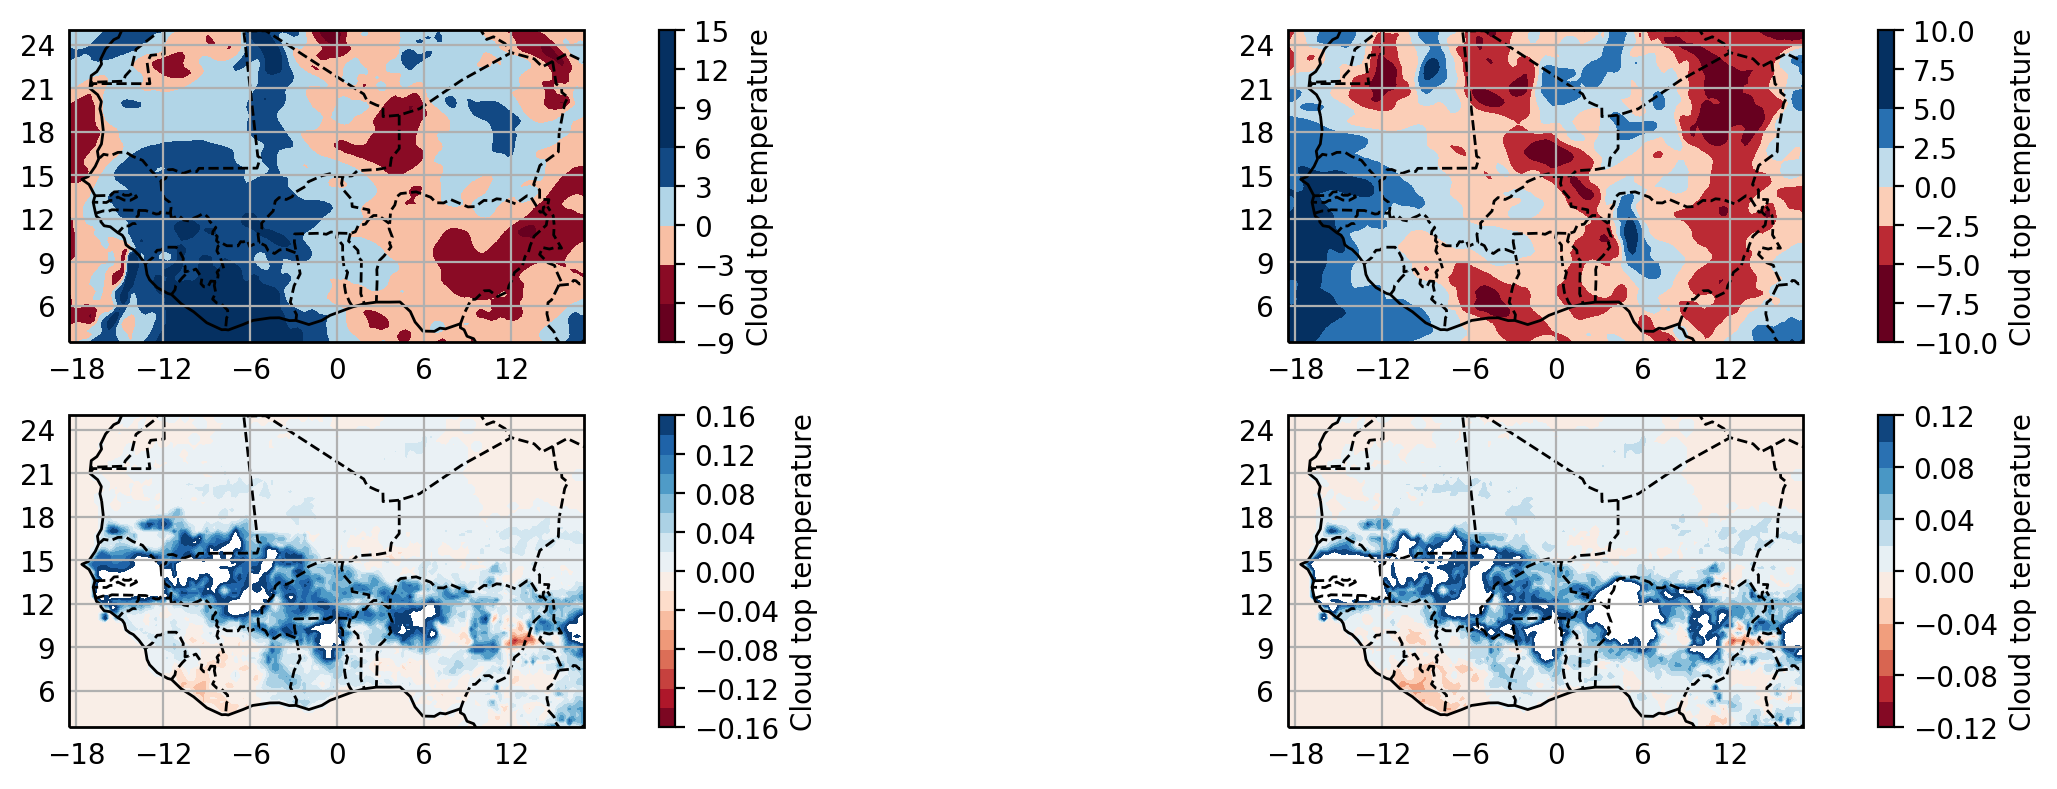

In [202]:
f = plt.figure(figsize=(14,4), dpi=200)
ax = f.add_subplot(221,projection=ccrs.PlateCarree() )

plt.contourf(lsta_d['longitude'], lsta_d['latitude'], lsta_d['v'].sel(level=700, time=(lsta_d['time.day']==30)).squeeze(), cmap='RdBu', vmin=-5, vmax=5)
plt.colorbar(label='Cloud top temperature')
#plt.contour(msg['lon'], msg['lat'], msg['blobs'][36,:,:]/100, colors='white')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(222,projection=ccrs.PlateCarree() )

plt.contourf(lsta_d['longitude'], lsta_d['latitude'], lsta_d['v'].sel(level=700, time=(lsta_d['time.day']==31)).squeeze(), cmap='RdBu', vmin=-5, vmax=5)
plt.colorbar(label='Cloud top temperature')
#plt.contour(msg['lon'], msg['lat'], msg['blobs'][36,:,:]/100, colors='white')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

ax = f.add_subplot(223,projection=ccrs.PlateCarree() )

plt.contourf(srfc_dSM['longitude'], srfc_dSM['latitude'],srfc_dSM['swvl1'].sel(time=(srfc_dSM['time.day']==30)).squeeze()-srfc_dSM['swvl1'].sel(time=(srfc_dSM['time.day']==2)).squeeze(), cmap='RdBu', levels=np.arange(-0.16,0.17,0.02))
plt.colorbar(label='Cloud top temperature')
#plt.contour(msg['lon'], msg['lat'], msg['blobs'][36,:,:]/100, colors='white')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

ax = f.add_subplot(224,projection=ccrs.PlateCarree() )

plt.contourf(srfc_dSM['longitude'], srfc_dSM['latitude'], srfc_dSM['swvl1'].sel(time=(srfc_dSM['time.day']==31)).squeeze()-srfc_dSM['swvl1'].sel(time=(srfc_dSM['time.day']==2)).squeeze(), cmap='RdBu', levels=np.arange(-0.12,0.13,0.02))
plt.colorbar(label='Cloud top temperature')
#plt.contour(msg['lon'], msg['lat'], msg['blobs'][36,:,:]/100, colors='white')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
#ptime = pd.to_datetime(msg['time'].values[4])

#plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))

# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/MCSfiles/VERAblobs/pics/figTEST.png')

In [10]:
msg['blobs'].values[msg['blobs'].values==-999]=0

/home/ck/miniconda3/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


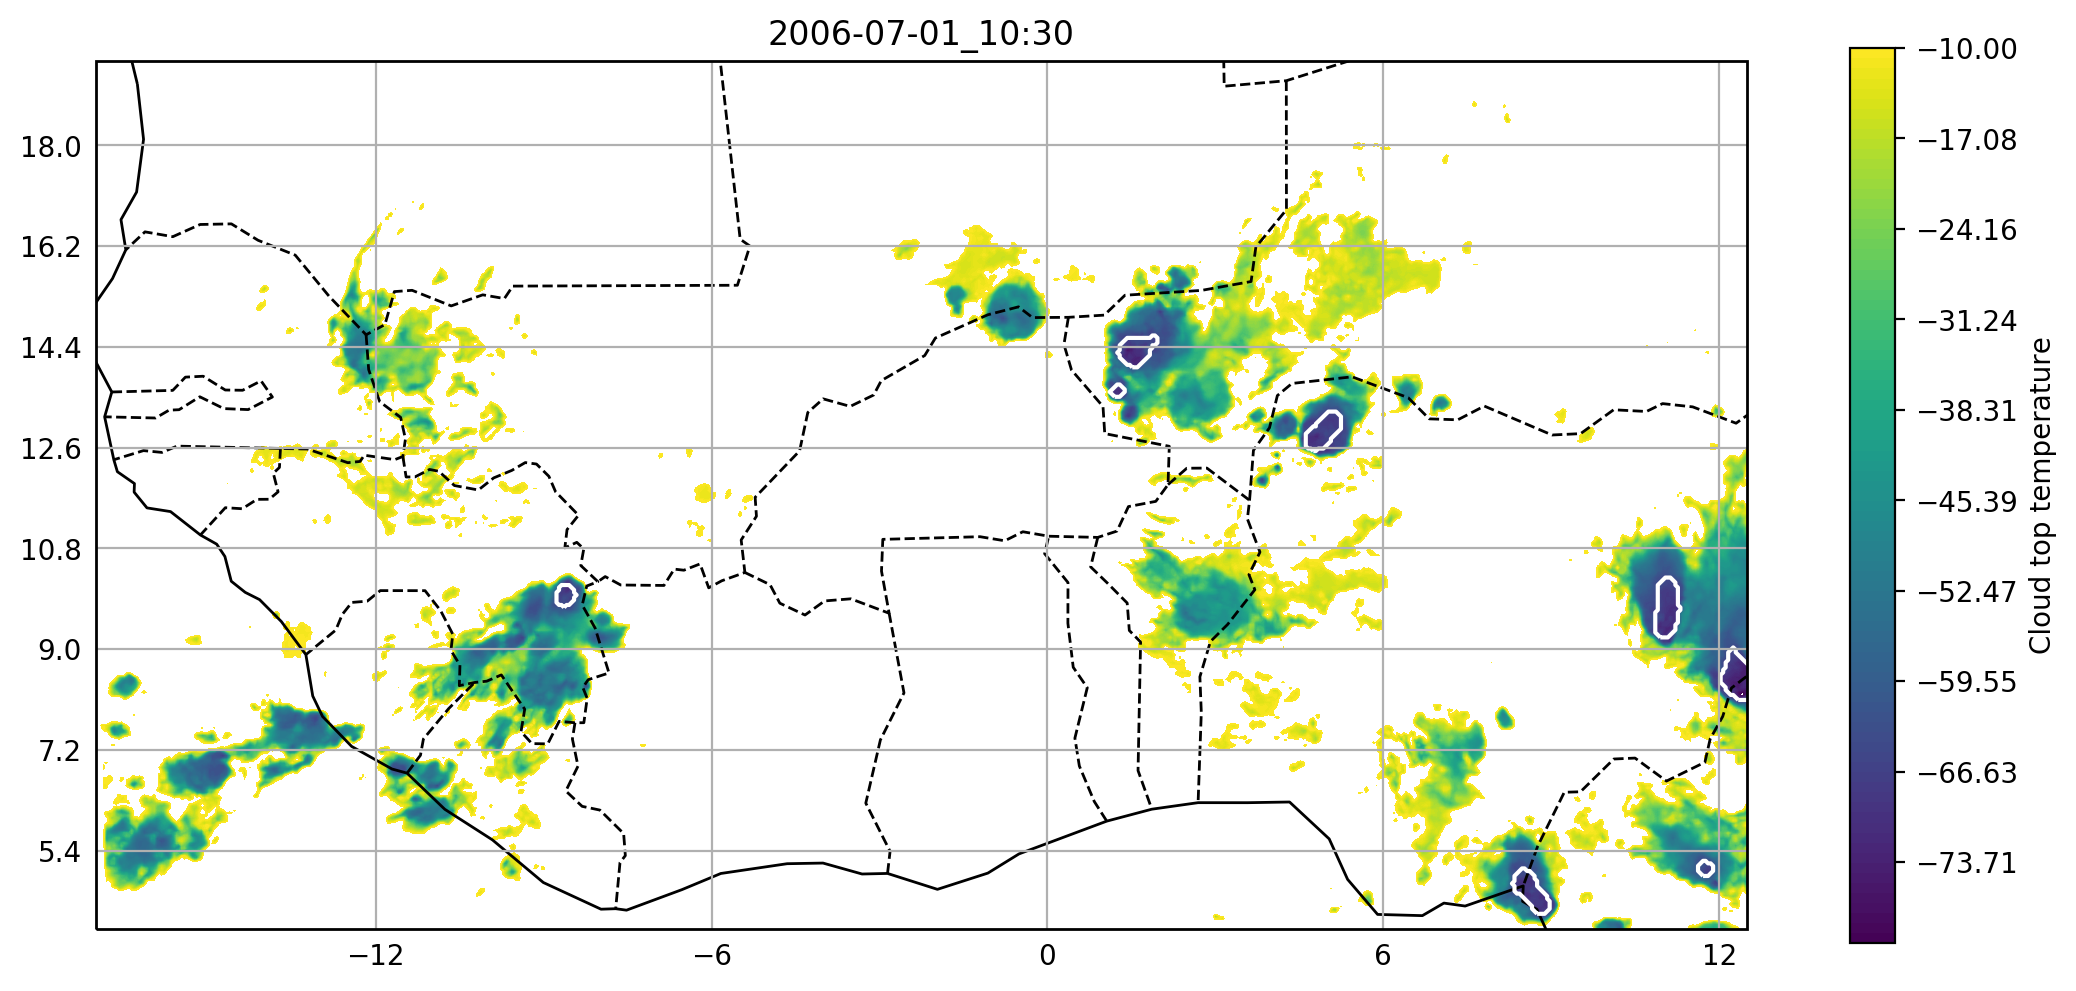

In [19]:
f = plt.figure(figsize=(11,5), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(msg['lon'], msg['lat'], msg['tir'][36,:,:]/100, levels=np.linspace(-80,-10,90), cmap='viridis')
plt.colorbar(label='Cloud top temperature')
plt.contour(msg['lon'], msg['lat'], msg['blobs'][36,:,:]/100, colors='white', levels=[-200,0,5]) #
#plt.colorbar(label='Cloud top temperature')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.ylim(4,19.5)
plt.xlim(-17,12.5)
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ptime = pd.to_datetime(msg['time'].values[4])

plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))
f.canvas.draw()
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/MCSfiles/VERAblobs/pics/figTEST.png')

In [20]:
for i in range(0,64):

    f = plt.figure(figsize=(11,5), dpi=200)
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    plt.contourf(msg['lon'], msg['lat'], msg['tir'][i,:,:]/100, levels=np.linspace(-83,-10,90), cmap='viridis')
    plt.colorbar(label='Cloud top temperature')
    plt.contour(msg['lon'], msg['lat'], msg['blobs'][i,:,:]/100, colors='white', levels=[-200,0,5])
    plt.ylim(4,19.5)
    plt.xlim(-17,12.5)
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    ptime = pd.to_datetime(msg['time'].values[i])

    plt.title(ptime.strftime('%Y-%m-%d_%H:%M'))
    plt.xlabel('Longitudes')
    plt.ylabel('Latitudes')
    f.canvas.draw()
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.tight_layout()
    
    f.savefig('/home/ck/DIR/cornkle/MCSfiles/VERAblobs/pics_cores/fig'+str(i).zfill(2)+'.png')
    plt.close('all')

/home/ck/miniconda3/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [11]:

f = plt.figure(figsize=(13,5), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(msg['lon'], msg['lat'], , levels=np.linspace(-85,-10,90), cmap='viridis')

def animate(i):
       c = msg['tir'][i,:,:]/100
    return c

anim = FuncAnimation(f, animate,
                               frames=5, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

SyntaxError: invalid syntax (<ipython-input-11-cdb6793dc32f>, line 4)

In [24]:
freq = []
relfreq = []
for hour in range(0,24):
    uni_counts = np.zeros_like(scales)
    msgo = msg[(msg['time.hour']==hour) & ((msg['time.month'] >=6) & (msg['time.month'] <=9))& \
               ((msg['time.year'] >=2006) & (msg['time.year'] <=2010))]
    
    msgvalues = msgo.values[(msgo.values>10) & np.isfinite(msgo.values)]
    uni, uni_counts_out = np.unique(msgvalues, return_counts=True)
    
    for s in scales:
        pos = np.where(uni==s)
        uni_counts[pos] = uni_counts_out[pos]
    
    freq.append(uni_counts)
    relfreq.append(uni_counts/np.sum(uni_counts))

In [25]:
scales

array([ 15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  24.,  25.,  27.,
        28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  45.,  48.,  50.,
        53.,  57.,  60.,  64.,  67.,  71.,  76.,  80.,  85.,  90.,  95.,
       101., 107., 113., 120., 127., 135., 143., 151., 160., 170., 180.,
       190., 202.])

In [49]:
rfreq = np.array(relfreq)
freq = np.array(freq)

In [53]:
fhourly = freq / np.sum(freq, axis=0).T

Text(0.5, 1.0, 'Fraction of cores|scale per hour of day')

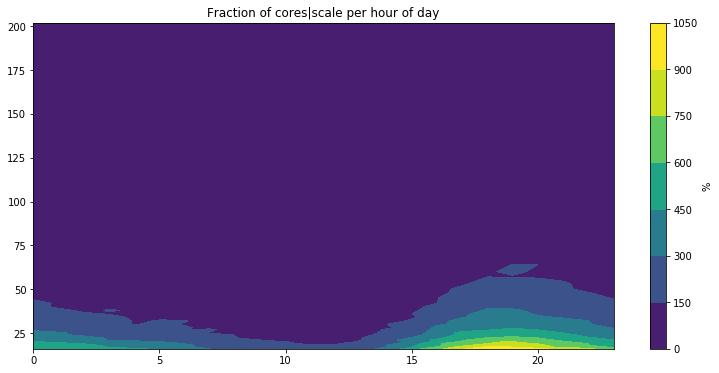

In [87]:
plt.figure(figsize=(13,6))
plt.contourf(np.arange(0,24), scales[1::], freq.T[1::], vmax=900)
plt.colorbar(label='%')
plt.title('Fraction of cores|scale per hour of day')

Text(0.5, 1.0, 'Fraction of cores|scale per hour of day')

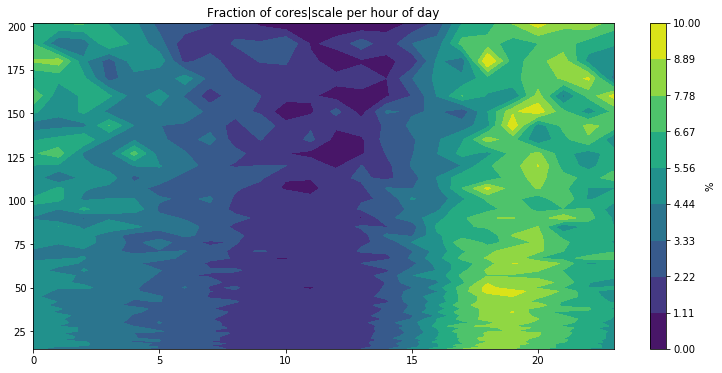

In [70]:
plt.figure(figsize=(13,6))
plt.contourf(np.arange(0,24), scales, fhourly.T*100, levels=np.linspace(0,10,10))
plt.colorbar(label='%')
plt.title('Fraction of cores|scale per hour of day')

Text(0.5, 1.0, 'Fraction of cores|scale per hour of day')

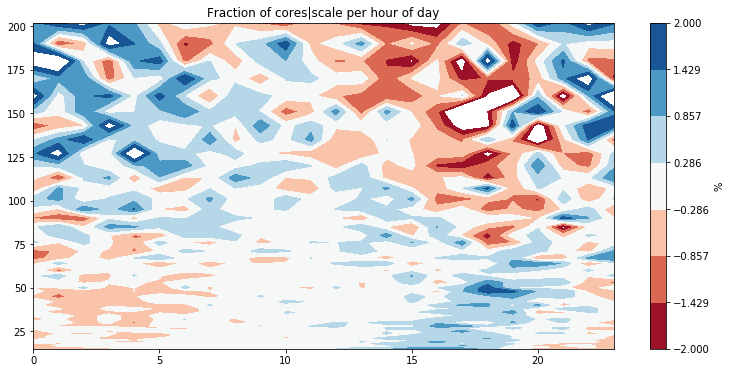

In [81]:
data = fhourly.T - np.mean(fhourly.T,axis=0).T
plt.figure(figsize=(13,6))
plt.contourf(np.arange(0,24), scales, data*100, cmap='RdBu', levels=np.linspace(-2,2,8))
plt.colorbar(label='%')
plt.title('Fraction of cores|scale per hour of day')

In [ ]:
freq = freq[]
fhourly = freq / np.sum(freq, axis=0).T

In [55]:
msg['date'] = msg['year'] + ' ' + msg['month'] + ' ' + msg['day']

In [56]:
msg['date'] = pd.to_datetime(msg['date'])

In [198]:
nomcs_dates = msg[msg['flag']==0]
mcs_dates = msg[msg['flag']==1]
all_dates = msg

In [199]:
len(nomcs_dates)

35

In [59]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [200]:
def run(shift, hour, tab):
    dic = {
    'q' : [],
    't' : [],
    'u' : [],
    'v' : [],
    'w' : [],
    'u_orig' : [],
    'v_orig' : [],        
    'd' : [],
    't2' : [],
    'u100' : [],
    'v100' : [],
    'u100_orig' : [],
    'v100_orig' : [],
    'slp' : [],
    'cnt' : [],
    'mcc' : [],
    'hcc' : [],
    'cape' : [],
    'divMoist' : [],
    'ice' : [],
    'ice_orig' : [],
    'sh' : [],
    'rh' : [],
    'zshear' : [],
    'u850' : [],
    'v850' : []
    }
    
    clim = '/home/ck/DIR/mymachine/ERA5/monthly/synop_selfmade/CLIM_2000-2014/'
    
    #box = [-4.5,3.5,9,15] #ouaga
    box = [-4,7,9,16.5] # WA



    for date in tab:


        single = tab[tab==date]
       
        dt = pd.to_datetime(date)
        
        
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
            
        window1 = dt - pd.Timedelta('7days')
        window2 = dt + pd.Timedelta('7days')
        

        fdate = '_' + str(dt.year) +'_' + str(dt.month).zfill(2) + '_'# + str(dt.day).zfill(2)
        
        hour = hour
        shour = hour

        try:

            lsta = xr.open_dataset(cnst.ERA5 + 'hourly/pressure_levels/ERA5' + fdate + 'pl.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            lsta_clim = xr.open_dataset(clim + \
                            'pressure_levels/ERA5_2000-2014_CLIM_' + str(dt.month).zfill(2) + '-'+str(hour).zfill(2)+'_pl.nc')
            
            srfc = xr.open_dataset(cnst.ERA5 + 'hourly/surface/ERA5' + fdate + 'srfc.nc') #sma  #'AMSR_L3_LPRMv05_A_'
            srfc_clim = xr.open_dataset(clim + \
                            'surface/ERA5_2000-2014_CLIM_' + str(dt.month).zfill(2) + '-'+str(hour).zfill(2)+'_srfc.nc')

        except:
            print('File missing', cnst.ERA5  + 'hourly/pressure_levels/ERA5' + fdate + 'pl.nc')
            continue
            
        lsta = u_darrays.flip_lat(lsta)
        srfc = u_darrays.flip_lat(srfc)
        

        lsta = lsta.sel(longitude=slice(box[0], box[1]), latitude=slice(box[2],box[3]))
        lsta_clim = lsta_clim.sel(lon=slice(box[0], box[1]), lat=slice(box[2],box[3]))
        
        srfc = srfc.sel(longitude=slice(box[0], box[1]), latitude=slice(box[2],box[3]))
        srfc_clim = srfc_clim.sel(lon=slice(box[0], box[1]), lat=slice(box[2],box[3]))
        
        pos = np.where(lsta['time.hour']==shour)
        if np.sum(pos) == 0:
            continue
        
        try:
            lsta_low = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=925)
        except:
            continue
        lsta_up = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=650)
        lsta_mid = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00', level=850)
        
        srfc_low = srfc.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(hour).zfill(2)+':00:00')
        
        lsta10 = lsta.isel(time=pos[0])
        lsta10_low = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=925)
        
        lsta10_up = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=650)
        
        lsta10_mid = lsta10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'), level=850)
        
        
#         lsta10_low = lsta10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00', level=925)
        
#         lsta10_up = lsta10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00', level=650)
        
        
        
        
        pos = np.where(srfc['time.hour']==shour)
        #ipdb.set_trace()
        srfc10 = srfc.isel(time=pos[0])
        srfc10 = srfc10.sel(time=slice(str(window1.year)+'-'+str(window1.month)+'-'+str(window1.day)+'T'+str(shour).zfill(2)+':00:00' , \
                                      str(window2.year)+'-'+str(window2.month)+'-'+str(window2.day)+'T'+str(shour).zfill(2)+':00:00'))
     
        
#         srfc10 = srfc.isel(time=pos[0])
#         srfc10 = srfc10.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day)+'T'+str(shour).zfill(2)+':00:00' )
     
        
        
        
        lsta_clim_low = lsta_clim.sel(level=925)
        lsta_clim_up = lsta_clim.sel(level=650)
        
        #ipdb.set_trace()

        q = lsta_low['q'].squeeze()
        u = lsta_up['u'].squeeze()
        v = lsta_up['v'].squeeze()
        w = lsta_low['w'].squeeze()
        t = lsta_low['t'].squeeze()
        d = lsta_low['d'].squeeze()
        rh = lsta_low['r'].squeeze()
        t2 = srfc_low['t2m'].squeeze()
        u100 = srfc_low['u100'].squeeze()
        v100 = srfc_low['v100'].squeeze()
        u850 = lsta_mid['u'].squeeze()
        v850 = lsta_mid['v'].squeeze()
        slp = srfc_low['sp'].squeeze()
        cape = srfc_low['cape'].squeeze()
        hcc = srfc_low['hcc'].squeeze()
        mcc = srfc_low['mcc'].squeeze()
        divMoist = srfc_low['p84.162'].squeeze()
        ice = srfc_low['tciw'].squeeze()
        sh = srfc_low['ishf'].squeeze()
        
        q_clim = lsta10_low['q'].squeeze().mean('time')
        u_clim = lsta10_up['u'].squeeze().mean('time')
        v_clim = lsta10_up['v'].squeeze().mean('time')
        u850_clim = lsta10_mid['u'].squeeze().mean('time')
        v850_clim = lsta10_mid['v'].squeeze().mean('time')
        w_clim = lsta10_low['w'].squeeze().mean('time')
        t_clim = lsta10_low['t'].squeeze().mean('time')
        rh_clim = lsta10_low['r'].squeeze().mean('time')
        d_clim = lsta10_low['d'].squeeze().mean('time')
        t2_clim = srfc10['t2m'].squeeze().mean('time')
        u100_clim = srfc10['u100'].squeeze().mean('time')
        v100_clim = srfc10['v100'].squeeze().mean('time')
        slp_clim = srfc10['sp'].squeeze().mean('time')
        cape_clim = srfc10['cape'].squeeze().mean('time')
        hcc_clim = srfc10['hcc'].squeeze().mean('time')
        mcc_clim = srfc10['mcc'].squeeze().mean('time')
        divMoist_clim = srfc10['p84.162'].squeeze().mean('time')
        ice_clim = srfc10['tciw'].squeeze().mean('time')
        sh_clim = srfc10['ishf'].squeeze().mean('time')
        
#         q_clim = lsta10_low['q'].squeeze()
#         u_clim = lsta10_up['u'].squeeze()
#         v_clim = lsta10_up['v'].squeeze()
#         w_clim = lsta10_low['w'].squeeze()
#         t_clim = lsta10_low['t'].squeeze()
#         rh_clim = lsta10_low['r'].squeeze()
#         d_clim = lsta10_low['d'].squeeze()
#         t2_clim = srfc10['t2m'].squeeze()
#         u100_clim = srfc10['u100'].squeeze()
#         v100_clim = srfc10['v100'].squeeze()
#         slp_clim = srfc10['sp'].squeeze()
#         cape_clim = srfc10['cape'].squeeze()
#         hcc_clim = srfc10['hcc'].squeeze()
#         mcc_clim = srfc10['mcc'].squeeze()
#         divMoist_clim = srfc10['p84.162']
#         ice_clim = srfc10['tciw'].squeeze()
#         sh_clim = srfc10['ishf'].squeeze()

#         q_clim = lsta_clim_low['q'].squeeze()
#         u_clim = lsta_clim_up['u'].squeeze()
#         v_clim = lsta_clim_up['v'].squeeze()
#         t_clim = lsta_clim_low['t'].squeeze()
#         d_clim = lsta_clim_low['d'].squeeze()
#         t2_clim = srfc_clim['t2m'].squeeze()
#         u100_clim = srfc_clim['u100'].squeeze()
#         v100_clim = srfc_clim['v100'].squeeze()
#         slp_clim = srfc_clim['msl'].squeeze()

        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')

        cnt = np.zeros_like(q.values)
        cnt[np.isfinite(q.values)] = 1

        dic['q'].append(q.values- q_clim.values)
        dic['v'].append(v.values- v_clim.values)
        dic['w'].append(w.values- w_clim.values)
        dic['u'].append(u.values- u_clim.values)
        dic['u850'].append(u850.values- u850_clim.values)
        dic['v850'].append(v850.values- v850_clim.values)
        dic['rh'].append(rh.values- rh_clim.values)
        dic['v_orig'].append(v.values)#
        dic['u_orig'].append(u.values)#
        dic['t'].append(t.values-t_clim.values)
        dic['d'].append(d.values-d_clim.values)
        dic['t2'].append(t2.values-t2_clim.values)
        dic['u100'].append(u100.values-u100_clim.values)
        dic['v100'].append(v100.values-v100_clim.values)
        dic['u100_orig'].append(u100.values)#
        dic['v100_orig'].append(v100.values)#
        dic['slp'].append(slp.values-slp_clim.values)
        dic['cape'].append(cape.values-cape_clim.values)#s-v100_clim.values)
        dic['hcc'].append(hcc.values-hcc_clim.values)
        dic['mcc'].append(mcc.values-mcc_clim.values)
        dic['divMoist'].append(divMoist.values-divMoist_clim.values)#-slp_clim.values)
        dic['ice'].append(ice.values-ice_clim.values)
        dic['ice_orig'].append(ice.values)
        dic['sh'].append(sh.values-sh_clim.values)
        ws, wd = u_met.u_v_to_ws_wd(u.values-u100.values, v.values-v100.values)
        wsclim, wd = u_met.u_v_to_ws_wd(u_clim.values-u100_clim.values, v_clim.values-v100_clim.values)
        
#         ws = u.values-u100.values
#         wsclim = u_clim.values-u100_clim.values
        
        dic['zshear'].append(ws-wsclim) #
        dic['cnt'].append(cnt)

        lat = lsta_low.latitude.values
        lon = lsta_low.longitude.values
    
    for k in dic.keys():
        dic[k] = np.nansum(np.stack(dic[k], axis=0), axis=0)

    return dic, lat, lon

In [201]:
def calc(dic):
    
    dics = {}
    for k in dic.keys():
        if k == 'cnt':
            continue
        dics[k] = dic[k] / dic['cnt']
    return dics

In [202]:
dic, lat, lon = run(0,12,all_dates['date'])

Doing AMSR_20040601.nc
Doing AMSR_20040614.nc
Doing AMSR_20040620.nc
Doing AMSR_20040702.nc
Doing AMSR_20040716.nc
Doing AMSR_20040807.nc
Doing AMSR_20040823.nc
Doing AMSR_20040906.nc
Doing AMSR_20040908.nc
Doing AMSR_20040919.nc
Doing AMSR_20050626.nc
Doing AMSR_20050709.nc
Doing AMSR_20050720.nc
Doing AMSR_20050730.nc
Doing AMSR_20050802.nc
Doing AMSR_20050804.nc
Doing AMSR_20050808.nc
Doing AMSR_20050814.nc
Doing AMSR_20050828.nc
Doing AMSR_20050913.nc
Doing AMSR_20050926.nc
Doing AMSR_20050930.nc
Doing AMSR_20060608.nc
Doing AMSR_20060627.nc
Doing AMSR_20060711.nc
Doing AMSR_20060807.nc
Doing AMSR_20060903.nc
Doing AMSR_20070605.nc
Doing AMSR_20070616.nc
Doing AMSR_20070621.nc
Doing AMSR_20070622.nc
Doing AMSR_20070627.nc
Doing AMSR_20070713.nc
Doing AMSR_20070715.nc
Doing AMSR_20070727.nc
Doing AMSR_20070820.nc
Doing AMSR_20070823.nc
Doing AMSR_20070827.nc
Doing AMSR_20080708.nc
Doing AMSR_20080725.nc
Doing AMSR_20080811.nc
Doing AMSR_20080824.nc
Doing AMSR_20090615.nc
Doing AMSR_

In [203]:
dic['t2']/dic['cnt']

array([[ 0.1891537 ,  0.22636539,  0.30509213, ..., -0.37279016,
        -0.37399974, -0.41080144],
       [ 0.17260347,  0.22312766,  0.29979032, ..., -0.36324894,
        -0.37655064, -0.42924768],
       [ 0.20082505,  0.23872788,  0.27442986, ..., -0.3457717 ,
        -0.37712187, -0.44042143],
       ...,
       [ 0.16230792,  0.1813394 ,  0.21533957, ...,  0.28677619,
         0.26114646,  0.20981841],
       [ 0.15759456,  0.16968204,  0.1867288 , ...,  0.28634068,
         0.26350924,  0.2170184 ],
       [ 0.1250779 ,  0.11421078,  0.13367632, ...,  0.28228077,
         0.26741046,  0.23890847]], dtype=float32)

In [204]:
dic = calc(dic)

In [205]:
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu_r', levels=levels, extend='both')
    ax.coastlines()
    
    ax.plot(2.13, 13.46,'bo')

    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='red', linewidths=0.8 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('K')

In [206]:
np.arange(-1,1,5)

array([-1])

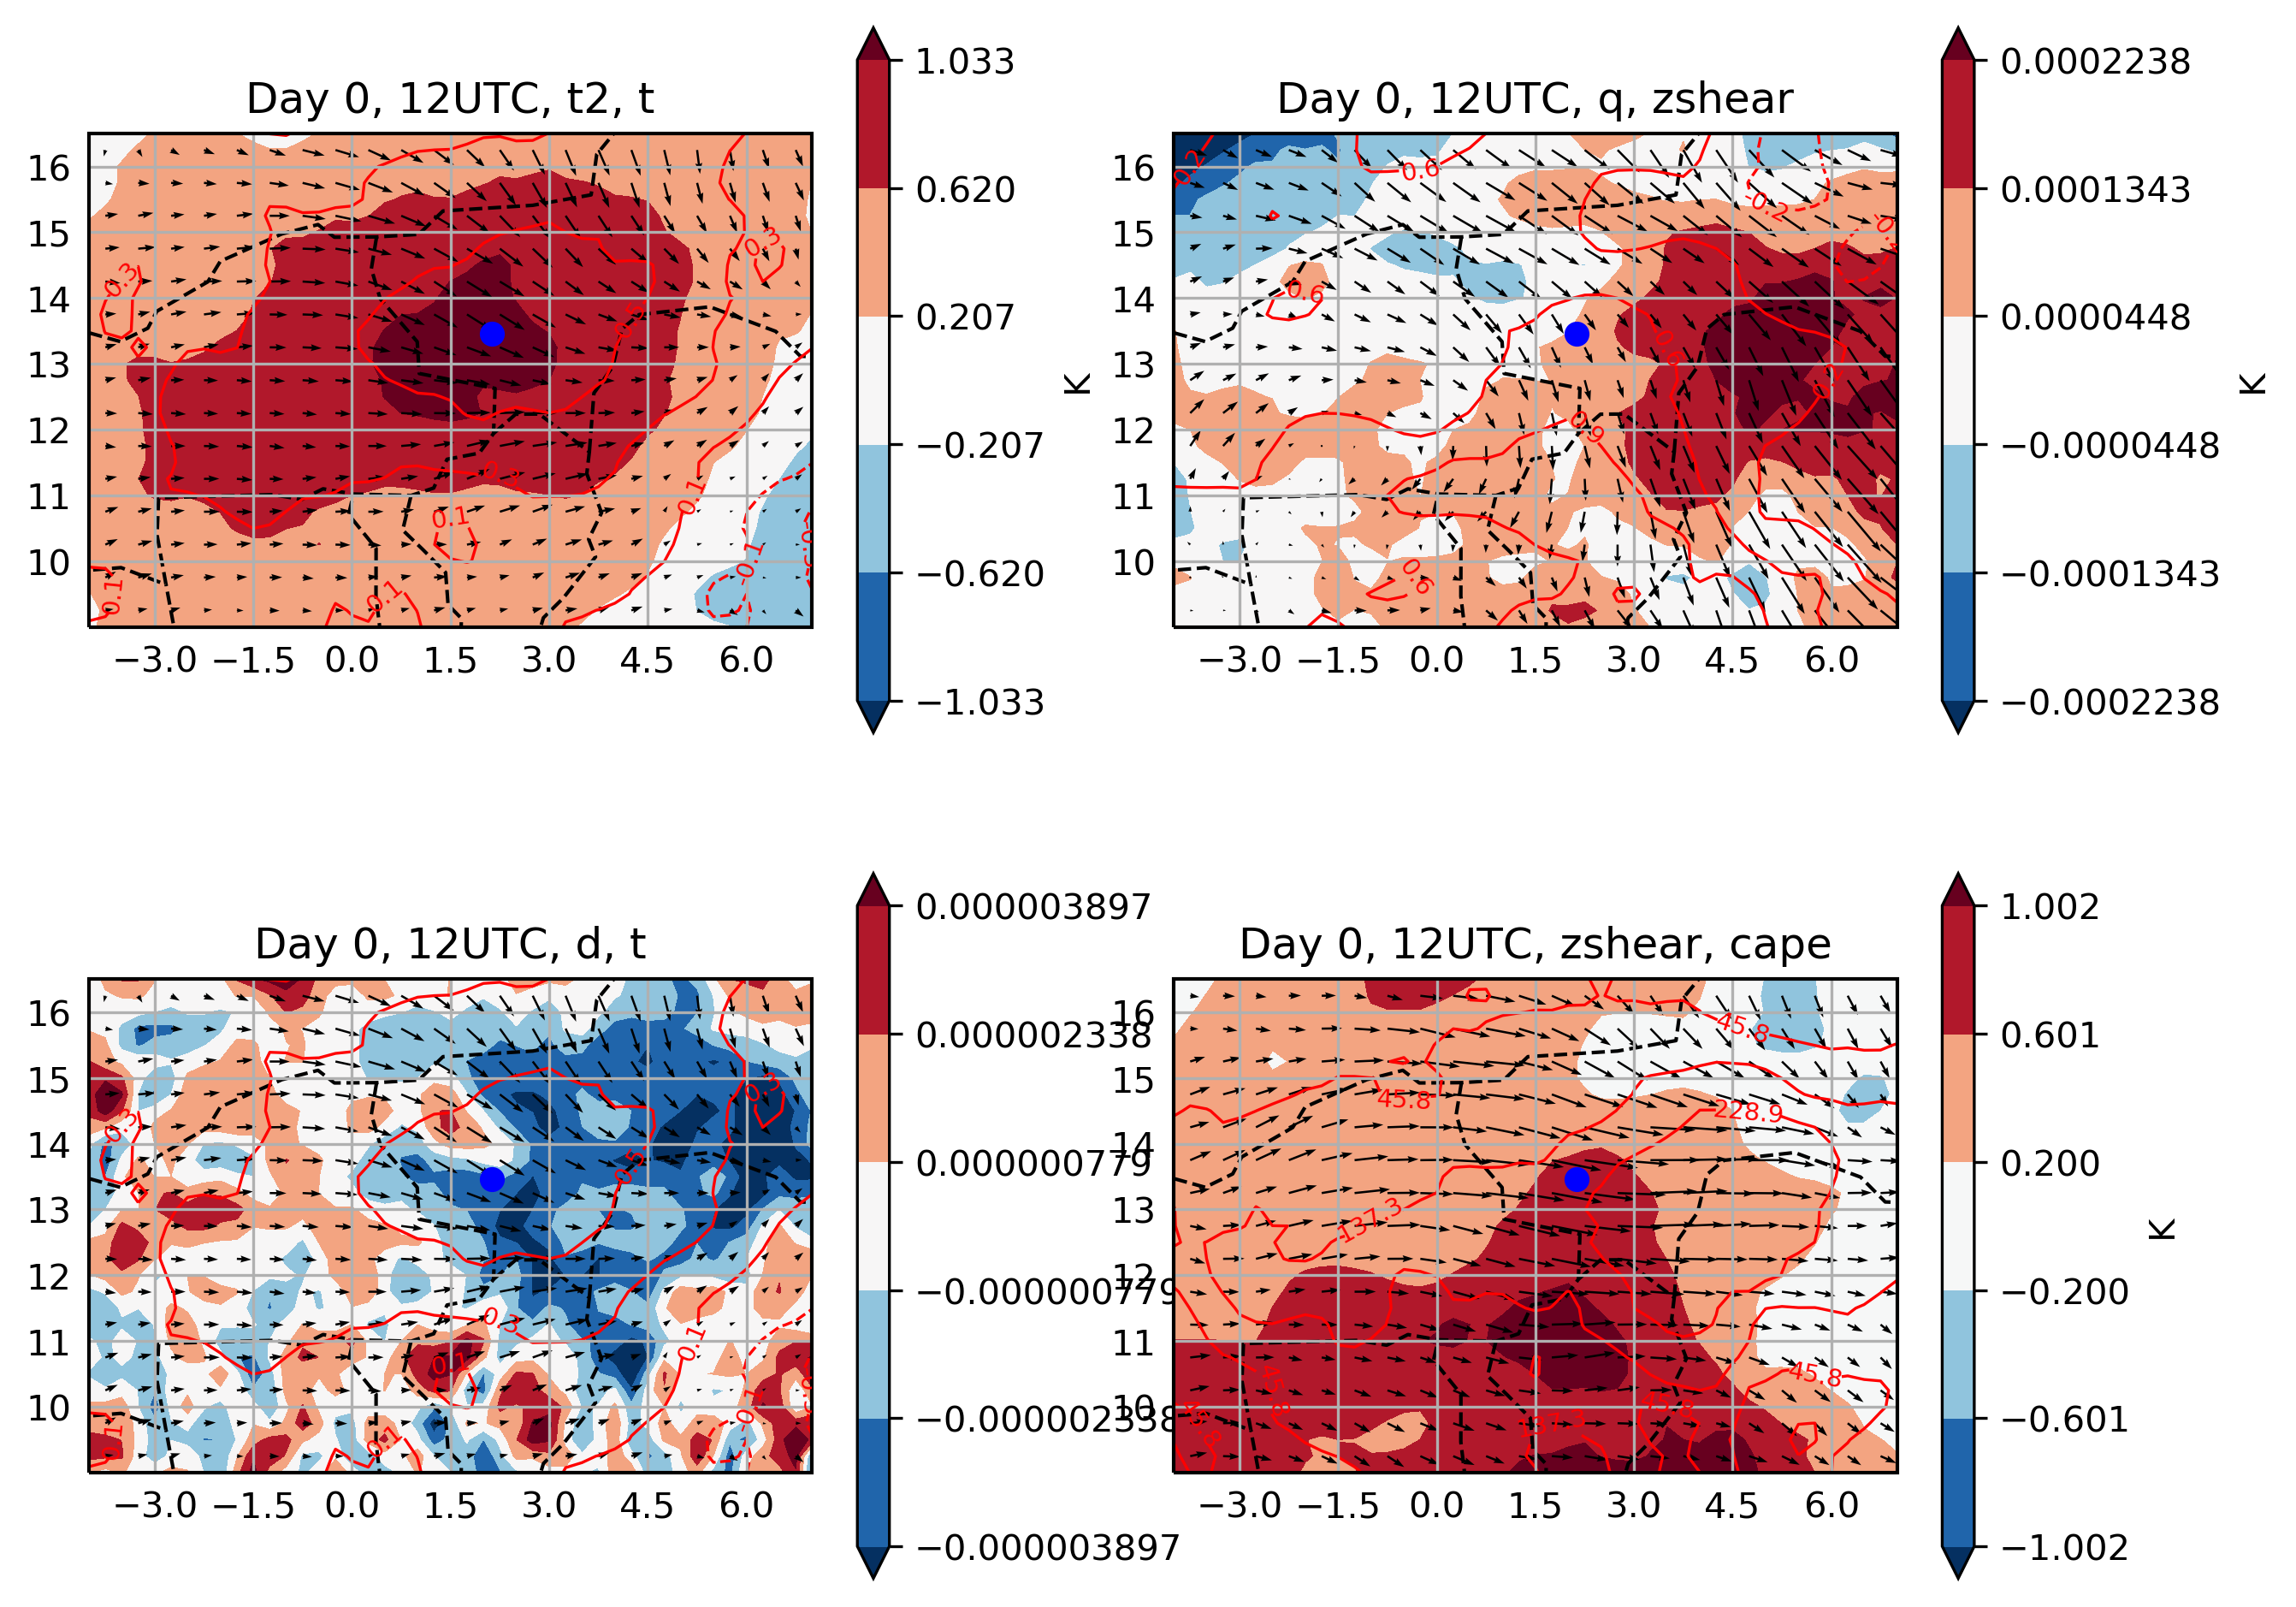

In [209]:
st=2
sarrow = 1
scale = 20
f = plt.figure(figsize=(10,8), dpi=300)
listi = [('t2', 't','100'), ('q', 'zshear',''), ('d','t','100'), ('zshear', 'cape', '850') ]
for ids, ll in enumerate(listi):
    ax = f.add_subplot(2,2,ids+1, projection=ccrs.PlateCarree())
    lon2d, lat2d = np.meshgrid(lon,lat)
    xquiv = lon2d[sarrow::st, sarrow::st]
    yquiv = lat2d[sarrow::st, sarrow::st]


    ws, wd = u_met.u_v_to_ws_wd(dic['u']-dic['u100'], dic['v']-dic['v100']) 
    var = dic[ll[0]]
    u = dic['u'+ll[2]]
    v = dic['v'+ll[2]]
    cvar = ll[1]
    edge = np.max([np.abs(np.percentile(dic[cvar],10)),np.abs(np.percentile(dic[cvar],90))])
    levs = np.linspace(edge*-1,edge,6)
    contour = {'data' : dic[cvar], 'x': lon, 'y' : lat, 'levels' : levs}

    edge = np.max([np.abs(np.percentile(var,5)),np.abs(np.percentile(var,95))])
#     if cvar == 'zshear':
#         edge1 = 10
#     else:
#         edge1 = edge*-1
    lev = np.linspace(edge*-1,edge,6)

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    draw_map(ax, var, lat, lon, title='Day 0, 12UTC, '+ll[0]+', '+ll[1],  quiver=qin, levels=lev, contour=contour)
    plt.savefig(cnst.network_data + 'figs/LSTA/ERA5_eulerian/niamey/ERA5_day0_12UTC_allMCS.jpg')

-3
Doing AMSR_20040617.nc
Doing AMSR_20040713.nc
Doing AMSR_20040804.nc
Doing AMSR_20040820.nc
Doing AMSR_20040916.nc
Doing AMSR_20050801.nc
Doing AMSR_20050910.nc
Doing AMSR_20050923.nc
Doing AMSR_20060605.nc
Doing AMSR_20060624.nc
Doing AMSR_20060708.nc
Doing AMSR_20060804.nc
Doing AMSR_20070602.nc
Doing AMSR_20070618.nc
Doing AMSR_20070619.nc


KeyboardInterrupt: 

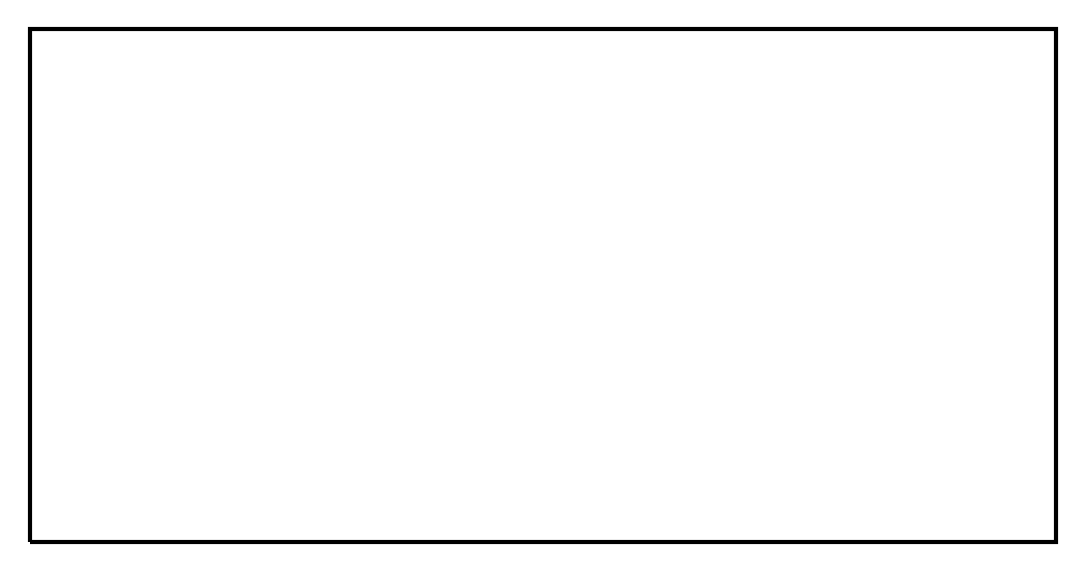

In [155]:
st=2
sarrow = 2
scale = 40
utag = 'u100'
vtag = 'v100'
hour=12
f = plt.figure(figsize=(15,6), dpi=300)

for ids, num in enumerate([-3,-2,-1,0,1,2]):

    ax = f.add_subplot(2,3,ids+1, projection=ccrs.PlateCarree())
    print(num)
    
    dic, lat, lon = run(num, hour,nomcs_dates['date'])
    dic = calc(dic)
    
    if ids == 0:
        lon2d, lat2d = np.meshgrid(lon,lat)
        xquiv = lon2d[sarrow::st, sarrow::st]
        yquiv = lat2d[sarrow::st, sarrow::st]
    #ipdb.set_trace()
    
    ws, wd = u_met.u_v_to_ws_wd(dic['u_orig']-dic['u100_orig'], dic['v_orig']-dic['v100_orig'])
    var = dic['t']
    
    if ids == 0:
        edge = np.max([np.abs(np.percentile(var,10)),np.abs(np.percentile(var,90))])
        lev = np.linspace(edge*-1,edge,6) # edge*-1
    #ipdb.set_trace()
    u = dic[utag]
    v = dic[vtag]

    uu = u[sarrow::st, sarrow::st]
    vv = v[sarrow::st, sarrow::st]
    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : scale}
    
    
    cvar = 'd'
    invar = dic[cvar]
    if ids == 0:
        edge = np.max([np.abs(np.percentile(invar,5)),np.abs(np.percentile(invar,95))])
        levs = np.linspace(edge*-1,edge,6) # edge*-1
    contour = {'data' : invar, 'x' : lon, 'y' : lat, 'levels' : levs}
    
    draw_map(ax, var, lat, lon, title='Day '+str(num),  quiver=qin, levels=lev, contour=contour)  #levels=lev,

f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/LSTA/ERA5_eulerian/niamey/ERA5_d_t_u100_anom_12UTC.jpg')

## 